# About the Data

# This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [25]:
import pandas as pd
dataset = pd.read_csv('amazon_alexa.csv',sep='\t')
dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [26]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Let's perform a small EDA on the dataset

In [27]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [28]:
dataset.groupby('rating').count()

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,96,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


The least ratings are rating 2 having only 96 entries and rating 5 is the one having the highest entries

In [29]:
dataset.groupby('feedback').count()

,rating,date,variation,verified_reviews
feedback,,,,
0,257,257,257,257
1,2893,2893,2893,2893


As we can see, the dataset has almost 10 times positive reviews compared to negative reviews.

In [30]:
dataset.query('feedback=="0" & rating>2')

,rating,date,variation,verified_reviews,feedback


if a review has a rating of 3 or more than 3, it is given a feedback of 1, else 0

In [31]:
dataset[dataset['feedback'] == 0]['verified_reviews'].iloc[2]

'Not much features.'

An example of a review having negative feedback.

In [32]:
#to calculate how long the reviews are:

dataset['length'] = dataset['verified_reviews'].apply(len)
dataset.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [12]:
dataset.length.max()

2851

Longest review is of 2851 characters. Let us see which one it is.

In [33]:
dataset.query('length=="2851"')

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [14]:
dataset[dataset['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

Wow, that's a pretty long review!

Now let us check some of the minimum character reviews.

In [15]:
dataset.length.min()

1

In [35]:
dataset.query('length=="2"')

,rating,date,variation,verified_reviews,feedback,length
1692,5,28-Jul-18,Black Show,👍🏻,1,2
1937,5,26-Jul-18,White Plus,A+,1,2
2179,5,30-Jul-18,Configuration: Fire TV Stick,ok,1,2
2436,5,30-Jul-18,Configuration: Fire TV Stick,😄😄,1,2


In [36]:
dataset.query('length=="1"')

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


In [37]:
dataset.query('length=="3"')

,rating,date,variation,verified_reviews,feedback,length
1200,2,28-Jul-18,Black Spot,Meh,0,3
1545,5,30-Jul-18,Black Show,Fun,1,3
1849,5,28-Jul-18,Black Plus,Fun,1,3


In [38]:
%matplotlib inline

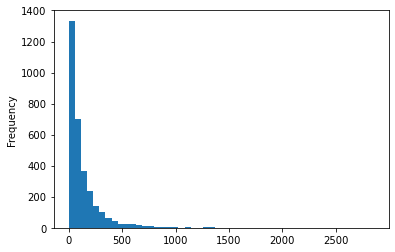

In [39]:
dataset['length'].plot(bins=50, kind='hist')

Majority of the reviews are reviews ranging between 0 and ~200 characters

Let's start with cleaning the texts and data preparation

In [44]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
corpus=[]
for i in range(0,3150):
    
    #replace non-letter with space
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'][i] )
    
    #convert all to lower case
    review=review.lower()
    
    #split
    review=review.split()
    
    #stemming and Lemmanization
    ps=PorterStemmer()
    lm = WordNetLemmatizer()
    
    #review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [lm.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] 
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [45]:
corpus

['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well',
 'music',
 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet',
 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house',
 'look great',
 'love listened song heard since childhood get news weather information great',
 'sent year old dad talk constantly',
 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time',
 'purchased mother knee prob

In [46]:
#creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

In [47]:
print(cv.get_feature_names())

['ability', 'able', 'absolutely', 'ac', 'accent', 'access', 'account', 'across', 'act', 'action', 'activated', 'actually', 'ad', 'adapter', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'adequate', 'adjust', 'advanced', 'advantage', 'advertised', 'advertisement', 'advertising', 'advise', 'age', 'ago', 'ai', 'al', 'alarm', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'alternative', 'although', 'always', 'amazed', 'amazing', 'amazingly', 'amazon', 'american', 'amount', 'android', 'annoying', 'another', 'answer', 'answered', 'answering', 'anticipated', 'anymore', 'anyone', 'anypod', 'anything', 'anytime', 'anywhere', 'apartment', 'app', 'apparently', 'appear', 'appears', 'apple', 'appliance', 'application', 'appointment', 'apps', 'area', 'arlo', 'around', 'arrived', 'artist', 'ask', 'asked', 'asking', 'asleep', 'aspect', 'assistant', 'attached', 'attempt', 'attention', 'attractive', 'audible', 'a

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [49]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [51]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [54]:
cm

array([[ 16,  38],
       [  2, 574]], dtype=int64)

Let us now calculate Precision and F1 Score to determine the correctness of the model.

In [55]:
from sklearn.metrics import precision_score
# calculate prediction
precision = precision_score(y_test, y_pred, average='binary')

In [56]:
precision

0.9379084967320261

In [58]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')

In [59]:
score

0.9663299663299663

In [60]:
dataset.iloc[:,4]

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64